In [1]:
# Imporing required libraries
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Q1 Identify the output variable.

In [2]:
# Importing the data set
income = pd.read_csv ('/Users/anandjha/Desktop/DataScience_SimpliLearn_Purdue_University/MachineLearning/Dataset for the project/train.csv')
income.head () # reading first few rows of data

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4



From the above data we can see that the target variable is Target.

### Q2 Understand the type of data.

In [3]:
# Checking the shape of the data set
 
print ("The shape of the data set is: ", income.shape)

The shape of the data set is:  (9557, 143)


The data has 143 columns and 9557 observations.

In [4]:
# To view the complete data set
 
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150
 
# To view data type of columns
 
income.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


There are total 8 float columns, 130 integer columns and 5 object columns.

### Q3 Check if there are any biases in your dataset.

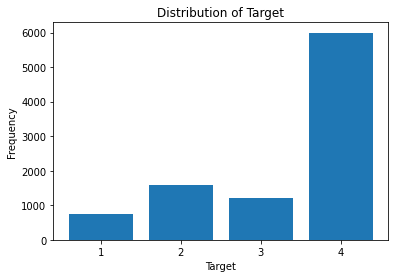

In [5]:
# checking the distribution of target variable
 
target_counts = income.Target.value_counts ()
plt.bar (target_counts.index, target_counts.values)
plt.title ('Distribution of Target')
plt.xlabel ('Target')
plt.ylabel ('Frequency')
plt.xticks (target_counts.index)
plt.show ()

The distribution of the target variable above shows that the data is biased towards the 4th class as it has more number of observations than others.

### Q4 Check whether all members of the house have the same poverty level.

In [6]:
house_pov = income.groupby ('idhogar').agg ({'Target' : 'nunique'}).Target
print ('\nNumber of household at different poverty levels =', (house_pov > 1).sum ())
print ('\nList of households at different poverty levels =\n', house_pov [house_pov > 1].index)


Number of household at different poverty levels = 85

List of households at different poverty levels =
 Index(['0172ab1d9', '03f4e5f4d', '0511912b6', '078a0b6e2', '09e25d616',
       '0f3e65c83', '0f9494d3a', '15a891635', '17fb04a62', '18832b840',
       '26b3a0f41', '288579c97', '28893b5e7', '2c9872b82', '2cb443214',
       '309fb7246', '30a70901d', '3c6973219', '3c73c107f', '3df651058',
       '3fe29a56b', '410194c8b', '417865404', '42ec8bef5', '43b9c83e5',
       '44f219a16', '46af47063', '4b6077882', '4c2dba109', '4dc11e11f',
       '4e19bd549', '50e064ee8', '513adb616', '54118d5d9', '55a662731',
       '564eab113', '594d3eb27', '5c3f7725d', '5c6f32bbc', '5e9329fc6',
       '614b48fb7', '636330516', '654ef7612', '67ad49822', '6833ac5dc',
       '694a0cbf4', '6a389f3de', '6bcf799cf', '6c543442a', '71cd52a80',
       '73d85d05d', '7ad269eef', '7c57f8237', '7e9d58c5c', '7ea6aca15',
       '80a66379b', '811a35744', '8242a51ec', '8420bcfca', '8ae3e74ca',
       '8bb6da3c1', '932287f5d'

### Q5 Check if there is a house without a family head.

In [7]:
house_head_train = income.groupby ('idhogar').agg ({'parentesco1' : sum}).parentesco1
print ('\nNumber of houses without a family head =', (house_head_train == 0).sum ())
print ('\nList of houses without a family head =\n', house_head_train [house_head_train == 0].index)


Number of houses without a family head = 15

List of houses without a family head =
 Index(['03c6bdf85', '09b195e7a', '1367ab31d', '1bc617b23', '374ca5a19',
       '61c10e099', '6b1b2405f', '896fe6d3e', 'a0812ef17', 'ad687ad89',
       'b1f4d89d7', 'bfd5067c2', 'c0c8a5013', 'd363d9183', 'f2bfa75c4'],
      dtype='object', name='idhogar')


### Q6 Set poverty level of the members and the head of the house within a family.

In [8]:
for house in house_pov [house_pov > 1].index :
    pov_level = income.loc [(income.idhogar == house) | (income.parentesco1 == 1), 'Target'].values [0]
    income.loc [income.idhogar == house, 'Target'] = pov_level
house_pov = income.groupby ('idhogar').agg ({'Target' : 'nunique'}).Target
print ('\nNumber of household at different poverty levels =', (house_pov > 1).sum ())


Number of household at different poverty levels = 0


### Q7 Count how many null values are existing in columns.

In [9]:
# To check for count of missing values in the columns
 
income.isna().sum () [income.isna ().any()]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

1. We can see that we have huge no. of missing values in the columns, v2a1, v18q1, rez_esc. Hence, we can drop these columns.
2. We can also see missing values in meaneduc and SQBmeaned, having 5 missing values each. We can see the summary statistics of these columns to decide whether to replace with mean or median values.

### Q8 Remove null value rows of the target variable.

As seen above there are no missing values in the Target variable but there are null values in other columns which we can remove.

In [10]:
# Dropping the columns v2a1 and rez_esc
 
income.drop (columns = ['v2a1', 'v18q1', 'rez_esc'], inplace = True)

In [11]:
# Checking the desciptive statistics of the 2 variables
 
income [['meaneduc', 'SQBmeaned']].describe ()

,meaneduc,SQBmeaned
count,9552.000000,9552.000000
mean,9.231523,102.588867
std,4.167694,93.516890
min,0.000000,0.000000
25%,6.000000,36.000000
50%,9.000000,81.000000
75%,11.600000,134.560010
max,37.000000,1369.000000


We can see that the data in the columns is skewed. We can replace the missing values using median values in the columns.

In [12]:
# Replacing missing values in columns meaneduc and SQBmeaned with median
 
income.meaneduc = income.meaneduc.fillna (income.meaneduc.median ())
income.SQBmeaned = income.SQBmeaned.fillna (income.SQBmeaned.median ())

In [13]:
# Checking for values in each object type of columns
 
income.select_dtypes (object)

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no


##### We can see that the columns dependency, edjefe and edjefa have mix of numerical and categorical data. We need to treat them.

In [14]:
# checking for unique values in these columns
 
print (income.dependency.unique ())
print (income.edjefe.unique ())
print (income.edjefa.unique ())

['no' '8' 'yes' '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5'
 '.40000001' '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25'
 '.22222222' '5' '.83333331' '.80000001' '6' '3.5' '1.6666666' '.2857143'
 '1.75' '.71428573' '.16666667' '.60000002']
['10' '12' 'no' '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 'yes' '3' '18' '13' '20']
['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']


1. SQBdependency column is equal to dependency squared as per description.
2. The description of the columns edjefe, edjefa says that these are years of experience for males and females, yes= 1, no = 0, So, we need to replace yes with 1 and no with 0 and convert it into numeric type.

In [15]:
# Using column SQBdependency to replace yes/no values in column dependency
 
income2 = income [(income.dependency =='yes') | (income.dependency =='no')].copy ()
income2.dependency = (income2.SQBdependency ** 0.5).astype (object)
income.loc [income2.index, 'dependency'] = income2.dependency
income = income.astype ({'dependency' : 'float64'})
 
# Replacing yes= 1, no = 0 and converting the column into numeric type
 
income.edjefe = income.edjefe.replace ({'yes' : '1', 'no' : '0'})
income.edjefa = income.edjefa.replace ({'yes' : '1', 'no' : '0'})
income = income.astype ({'edjefe' : 'int64', 'edjefa' : 'int64'})

Class no 4 has values much more than other classes. Hence, the data is biased.

In [16]:
# Checking if there is any null values remaining in the data
 
income.isna().any ().any ()

False

### Q9 Predict the accuracy using random forest classifier.

Before we build the model we must apply dimensionality reduction

In [17]:
# Applying standard scaler and Principal component analysis
 
sc = StandardScaler ()
X_sc = sc.fit_transform (income.drop (columns = ['Target', 'Id', 'idhogar']))
pca = PCA ()
X_pca = pca.fit_transform (X_sc)
X_pca.shape

(9557, 137)

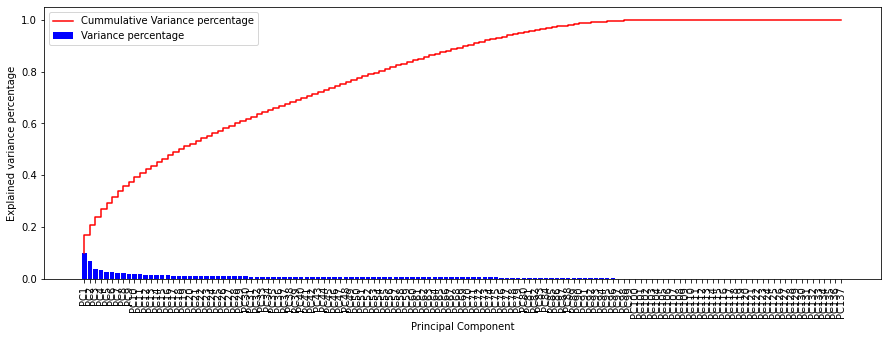

In [18]:
pca_index = ['PC'+str (i) for i in range (1,138)]
plt.figure (figsize=(15, 5))
plt.bar (pca_index, pca.explained_variance_ratio_, color = 'b', label = 'Variance percentage')
plt.step (pca_index, pca.explained_variance_ratio_.cumsum (), color = 'r', label = 'Cummulative Variance percentage')
plt.xticks (rotation = 90)
plt.xlabel ('Principal Component')
plt.ylabel ('Explained variance percentage')
plt.legend ()
plt.show ()

We can take components which explains 80% of the variance in the data

In [19]:
# Reducing the dimensionality to explain 80% of the variance
 
pca = PCA (n_components=0.8)
X_pca = pca.fit_transform (X_sc)
X_pca.shape

(9557, 55)

In [20]:
# Building the model and checking the accuracy

y = income.Target
rf = RandomForestClassifier (oob_score = True, random_state = 1).fit (X_pca, y)
print ('Accuracy of the model with the train data =', rf.score (X_pca, y))
print ('Out of Box score (similar to accuracy with the test data) =', rf.oob_score_)

Accuracy of the model with the train data = 1.0
Out of Box score (similar to accuracy with the test data) = 0.77011614523386


We get a test accuracy of 77% and train accuracy of 100% which looks like high variance but we need to check the results from cross validation to verify that.

### Q10 Check the accuracy using random forest with cross validation.

In [21]:
skf = StratifiedKFold (n_splits=5, shuffle=True)
score = cross_val_score (estimator=rf, X = X_pca, y = y, scoring = 'accuracy', cv = skf)
print ('The accuracy using 5 folds is', score)
print ('Mean accuracy of the model is', score.mean ())

The accuracy using 5 folds is [0.74947699 0.76569038 0.75771847 0.75614861 0.75248561]
Mean accuracy of the model is 0.7563040117881721


We get a mean accuracy of 76% with Random Forest with no significant variance across 5 folds and hence, the results are stable.
We can try some hyperparameter tuning to see if we can improve the results.

In [22]:
# Setting parameters for hyperparameter tuning

params = {'n_estimators' : [100, 200, 300, 500], 
          'max_depth' : [5, 10, 15, 20, 25, 30, 40, 50, 70, 100, None], 
          'max_features' : ['log2', 'sqrt', None]}

In [23]:
# Getting best max_depth

score = []
for max_depth in params ['max_depth'] :
  rf2 = RandomForestClassifier (oob_score = True, max_depth = max_depth, random_state = 1).fit (X_pca, y)
  score.append (rf2.oob_score_)
  print ('Accuracy at max_depth = {}, is {}'.format (max_depth, score [-1]))
best_max_depth = params ['max_depth'] [np.argmax (score)]
print ('Best accuracy of {} is achieved at max_depth = {}'.format (np.max(score), best_max_depth))

Accuracy at max_depth = 5, is 0.6717589201632311
Accuracy at max_depth = 10, is 0.7077534791252486
Accuracy at max_depth = 15, is 0.7486658993407973
Accuracy at max_depth = 20, is 0.7595479753060583
Accuracy at max_depth = 25, is 0.7675002615883646
Accuracy at max_depth = 30, is 0.7719995814586167
Accuracy at max_depth = 40, is 0.77011614523386
Accuracy at max_depth = 50, is 0.77011614523386
Accuracy at max_depth = 70, is 0.77011614523386
Accuracy at max_depth = 100, is 0.77011614523386
Accuracy at max_depth = None, is 0.77011614523386
Best accuracy of 0.7719995814586167 is achieved at max_depth = 30


In [24]:
# Getting best max_features

score = []
for max_features in params ['max_features'] :
  rf2 = RandomForestClassifier (oob_score = True, 
                                max_depth = best_max_depth, 
                                max_features = max_features, 
                                random_state = 1).fit (X_pca, y)
  score.append (rf2.oob_score_)
  print ('Accuracy at max_features = {}, is {}'.format (max_features, score [-1]))
best_max_features = params ['max_features'] [np.argmax (score)]
print ('Best accuracy of {} is achieved at max_features = {}'.format (np.max(score), best_max_features))

Accuracy at max_features = log2, is 0.7591294339227791
Accuracy at max_features = sqrt, is 0.7719995814586167
Accuracy at max_features = None, is 0.7882180600606885
Best accuracy of 0.7882180600606885 is achieved at max_features = None


In [25]:
# Getting best n_estimators

score = []
for n_estimators in params ['n_estimators'] :
  rf2 = RandomForestClassifier (oob_score = True,
                                n_estimators = n_estimators, 
                                max_depth = best_max_depth, 
                                max_features = best_max_features, 
                                random_state = 1).fit (X_pca, y)
  score.append (rf2.oob_score_)
  print ('Accuracy at n_estimators = {}, is {}'.format (n_estimators, score [-1]))
best_n_estimators = params ['n_estimators'] [np.argmax (score)]
print ('Best accuracy of {} is achieved at n_estimators = {}'.format (np.max(score), best_n_estimators))

Accuracy at n_estimators = 100, is 0.7882180600606885
Accuracy at n_estimators = 200, is 0.7907293083603641
Accuracy at n_estimators = 300, is 0.7933451920058596
Accuracy at n_estimators = 500, is 0.7938683687349587
Best accuracy of 0.7938683687349587 is achieved at n_estimators = 500


In [26]:
# Checking final Cross Validation scores

rf_final = RandomForestClassifier (oob_score = True,
                                   n_estimators = best_n_estimators,
                                   max_depth = best_max_depth,
                                   max_features = best_max_features,
                                   random_state = 1)
skf = StratifiedKFold (n_splits=5, shuffle=True)
score = cross_val_score (estimator=rf_final, X = X_pca, y = y, scoring = 'accuracy', cv = skf)
print ('The accuracy using 5 folds is', score)
print ('Mean accuracy of the model is', score.mean ())
print ('Standard Deviation of accuracy of the model is', score.std ())

The accuracy using 5 folds is [0.77667364 0.7834728  0.78597593 0.77289377 0.78911565]
Mean accuracy of the model is 0.7816263582999985
Standard Deviation of accuracy of the model is 0.005986735705517089


This is the best model we get. We get the best accuracy score of ___. We can use this model to predict the test data

In [27]:
# Importing test data

income_test = pd.read_csv ('/Users/anandjha/Desktop/DataScience_SimpliLearn_Purdue_University/MachineLearning/Dataset for the project/test.csv')

income_test.shape

(23856, 142)

In [28]:
# Checking for null values in the test data
 
income_test.isna ().sum () [income_test.isna ().any()]

v2a1         17403
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

In [29]:
# Dropping the columns v2a1 and rez_esc
 
income_test.drop (columns = ['v2a1', 'v18q1', 'rez_esc'], inplace = True)
 
# Replacing missing values in columns meaneduc and SQBmeaned with median
 
income_test.meaneduc = income_test.meaneduc.fillna (income_test.meaneduc.median ())
income_test.SQBmeaned = income_test.SQBmeaned.fillna (income_test.SQBmeaned.median ())

In [30]:
# Checking for values in each object type of columns
 
income_test.select_dtypes (object)

,Id,idhogar,dependency,edjefe,edjefa
0,ID_2f6873615,72958b30c,.5,no,17
1,ID_1c78846d2,72958b30c,.5,no,17
2,ID_e5442cf6a,72958b30c,.5,no,17
3,ID_a8db26a79,5b598fbc9,no,16,no
4,ID_a62966799,1e2fc704e,8,no,11
...,...,...,...,...,...
23851,ID_a065a7cad,3aa78c56b,.5,5,no
23852,ID_1a7c6953b,d237404b6,yes,6,no
23853,ID_07dbb4be2,d237404b6,yes,6,no
23854,ID_34d2ed046,d237404b6,yes,6,no


In [31]:
# Using column SQBdependency to replace yes/no values in column dependency
 
income2_test = income_test [(income_test.dependency =='yes') | (income_test.dependency =='no')].copy ()
income2_test.dependency = (income2_test.SQBdependency ** 0.5).astype (object)
income_test.loc [income2_test.index, 'dependency'] = income2_test.dependency
income_test = income_test.astype ({'dependency' : 'float64'})
 
# Replacing yes = 1, no = 0 and converting the column into numeric type
 
income_test.edjefe = income_test.edjefe.replace ({'yes' : '1', 'no' : '0'})
income_test.edjefa = income_test.edjefa.replace ({'yes' : '1', 'no' : '0'})
income_test = income_test.astype ({'edjefe' : 'int64', 'edjefa' : 'int64'})

In [32]:
# Applying standard scaler and Principal component analysis on the test data
 
sc_test = StandardScaler ()
X_test_sc = sc_test.fit_transform (income_test.drop (columns = ['Id', 'idhogar']))
X_test_pca = pca.transform (X_test_sc)

# Fitting the train data to the final model

rf_final.fit (X_pca, y)

# Predicting the test data
 
ypred = rf_final.predict (X_test_pca)

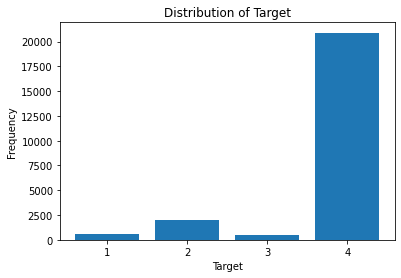

In [33]:
# Distribution of classification in the test data
 
Target_test = pd.Series (ypred)
target_counts = Target_test.value_counts ()
plt.bar (target_counts.index, target_counts.values)
plt.title ('Distribution of Target')
plt.xlabel ('Target')
plt.ylabel ('Frequency')
plt.xticks (target_counts.index)
plt.show ()

Observations:
1. Since, the data is biased. The class no 4 is predicted much more than others.
2. We can create other models to treat this imbalance.